### Import Necessary Packages

In [1]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

### Load Data

In [2]:
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")

### Split the Train and Test Data 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [4]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (194357, 143)
Shape of test set :  (83297, 143)
Percentage of classes in training set:
Data_prediction
0                  0.500116
1                  0.499884
dtype: float64
Percentage of classes in test set:
Data_prediction
1                  0.50027
0                  0.49973
dtype: float64


Earlier we coverted 0 to being smooth and 1 being congested <br> Above we see that 70% of the data is in the Training set and 30% of the data is in the test set

### Defining functions to get the model performance metrics and build the confusion matrix 

In [5]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [6]:
#defining function to build the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model 

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994824  0.995399   0.994253  0.994826
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.994286  0.99532   0.993271  0.994294


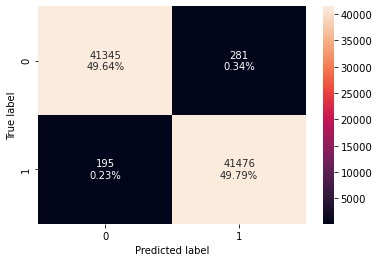

In [7]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree, X_train,y_train)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree, X_test,y_test)
print("Testing performance:\n", d_tree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)


We get good results with around 99.5% accuracy on the training set and a similar 99.4% accuray on the testing set. <br> We also notice that all the metrics have more than 99% perfromance on both the training and the testing set. <br> To further check what features are most important we will check two more models using random forest classifier and XG Boost and we expect to obtain simmilar results in terms of performance.

### Random Forest Model 

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994824  0.995399   0.994253  0.994826
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.994213  0.995177    0.99327  0.994222


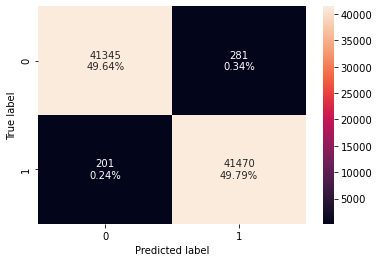

In [8]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

As we expected earlier, the model has metrics which are similar to the decision tree model. <br> Now we will further look at the XG Boost Model.


### XG Boost Model 

Training performance:
    Accuracy    Recall  Precision       F1
0  0.994711  0.994843   0.994577  0.99471
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.994334  0.994817   0.993863  0.994339


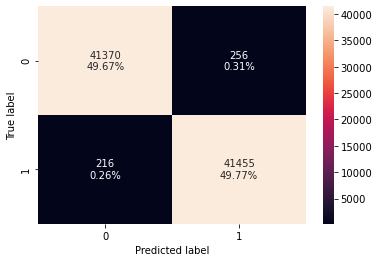

In [9]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric= "error")
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier, X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier, X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

The XG Boost model performs well and has similar results compared to the other two models. <br> Now we will tabulate the testing and training set results and compare their performance.

### Comparing all models performance 

In [10]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T, rf_estimator_model_train_perf.T,xgb_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Random Forest Estimator",
     "XGBoost Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Random Forest Estimator,XGBoost Classifier
Accuracy,0.994824,0.994824,0.994711
Recall,0.995399,0.995399,0.994843
Precision,0.994253,0.994253,0.994577
F1,0.994826,0.994826,0.994710


In [12]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,rf_estimator_model_test_perf.T,xgb_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Random Forest Estimator",
     "XGBoost Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Random Forest Estimator,XGBoost Classifier
Accuracy,0.994286,0.994213,0.994334
Recall,0.995320,0.995177,0.994817
Precision,0.993271,0.993270,0.993863
F1,0.994294,0.994222,0.994339


Looking at the results in the tables above, we see that all models have performed significantly well and now we will see what the important features are in the model according to our three seperate models

### Feature Importance 

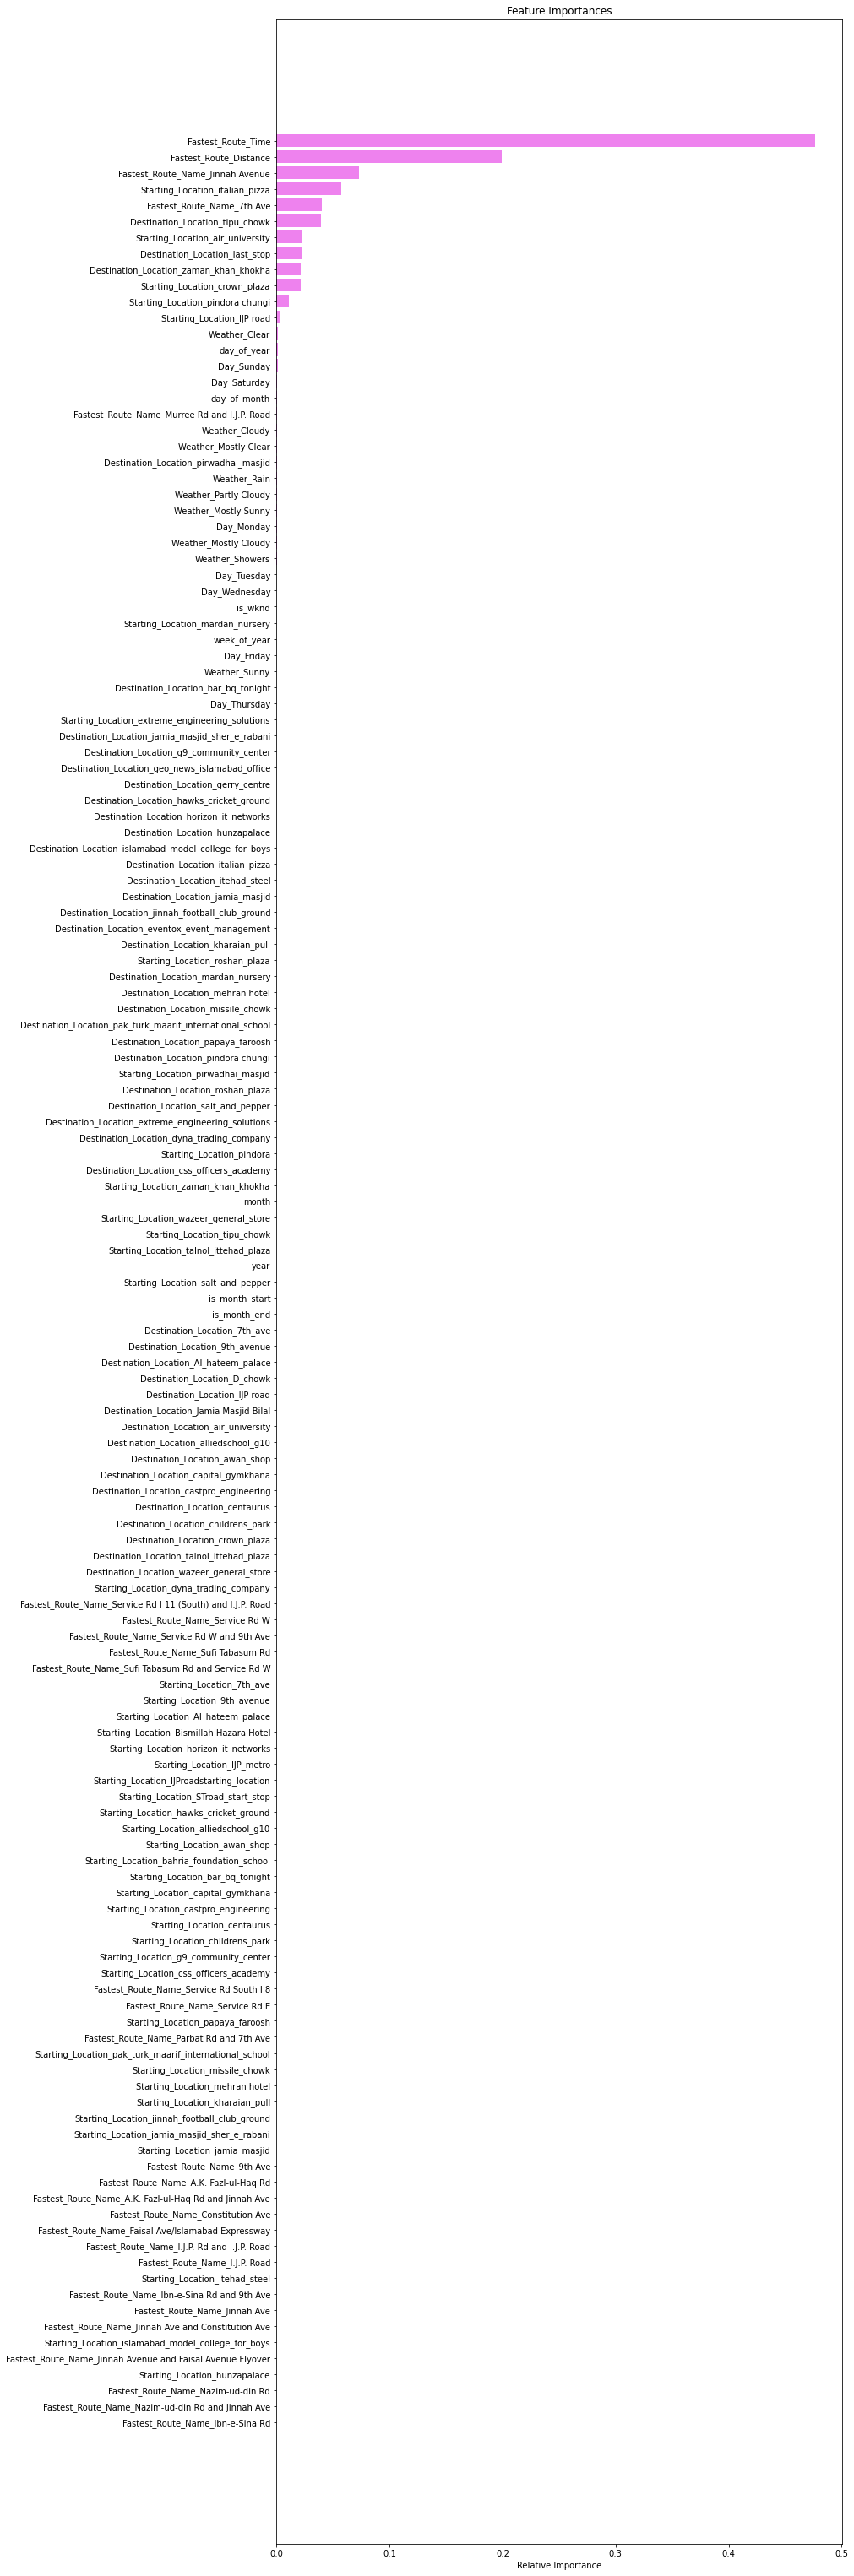

In [18]:
feature_names = X_train.columns
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,55))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

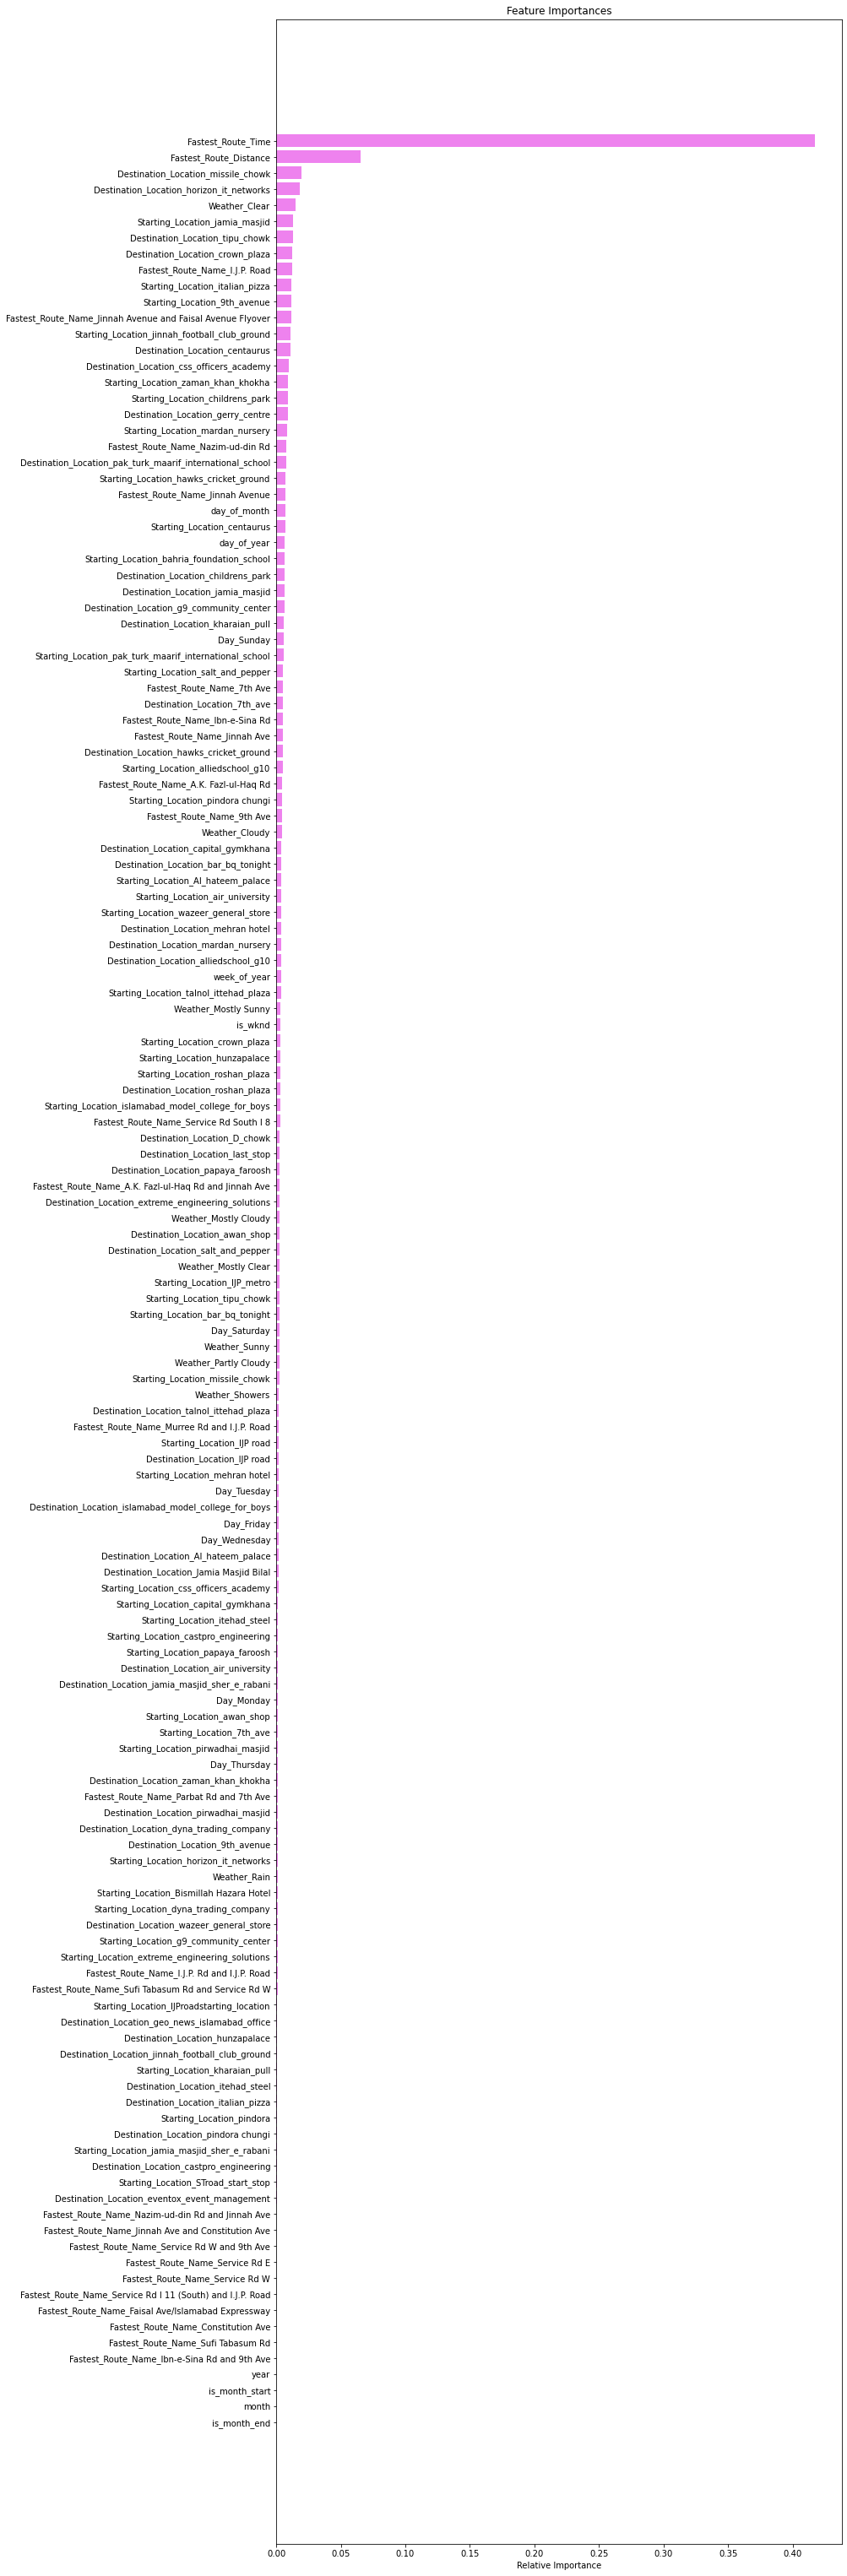

In [17]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,55))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Over here we obsereve the Most Important metric to be the Fastest_Route_Time followed by Fastest_Route_Distance. This tells us that these two features according to both the graph above. <br> Also, the staring location and the destination location are important features as well.

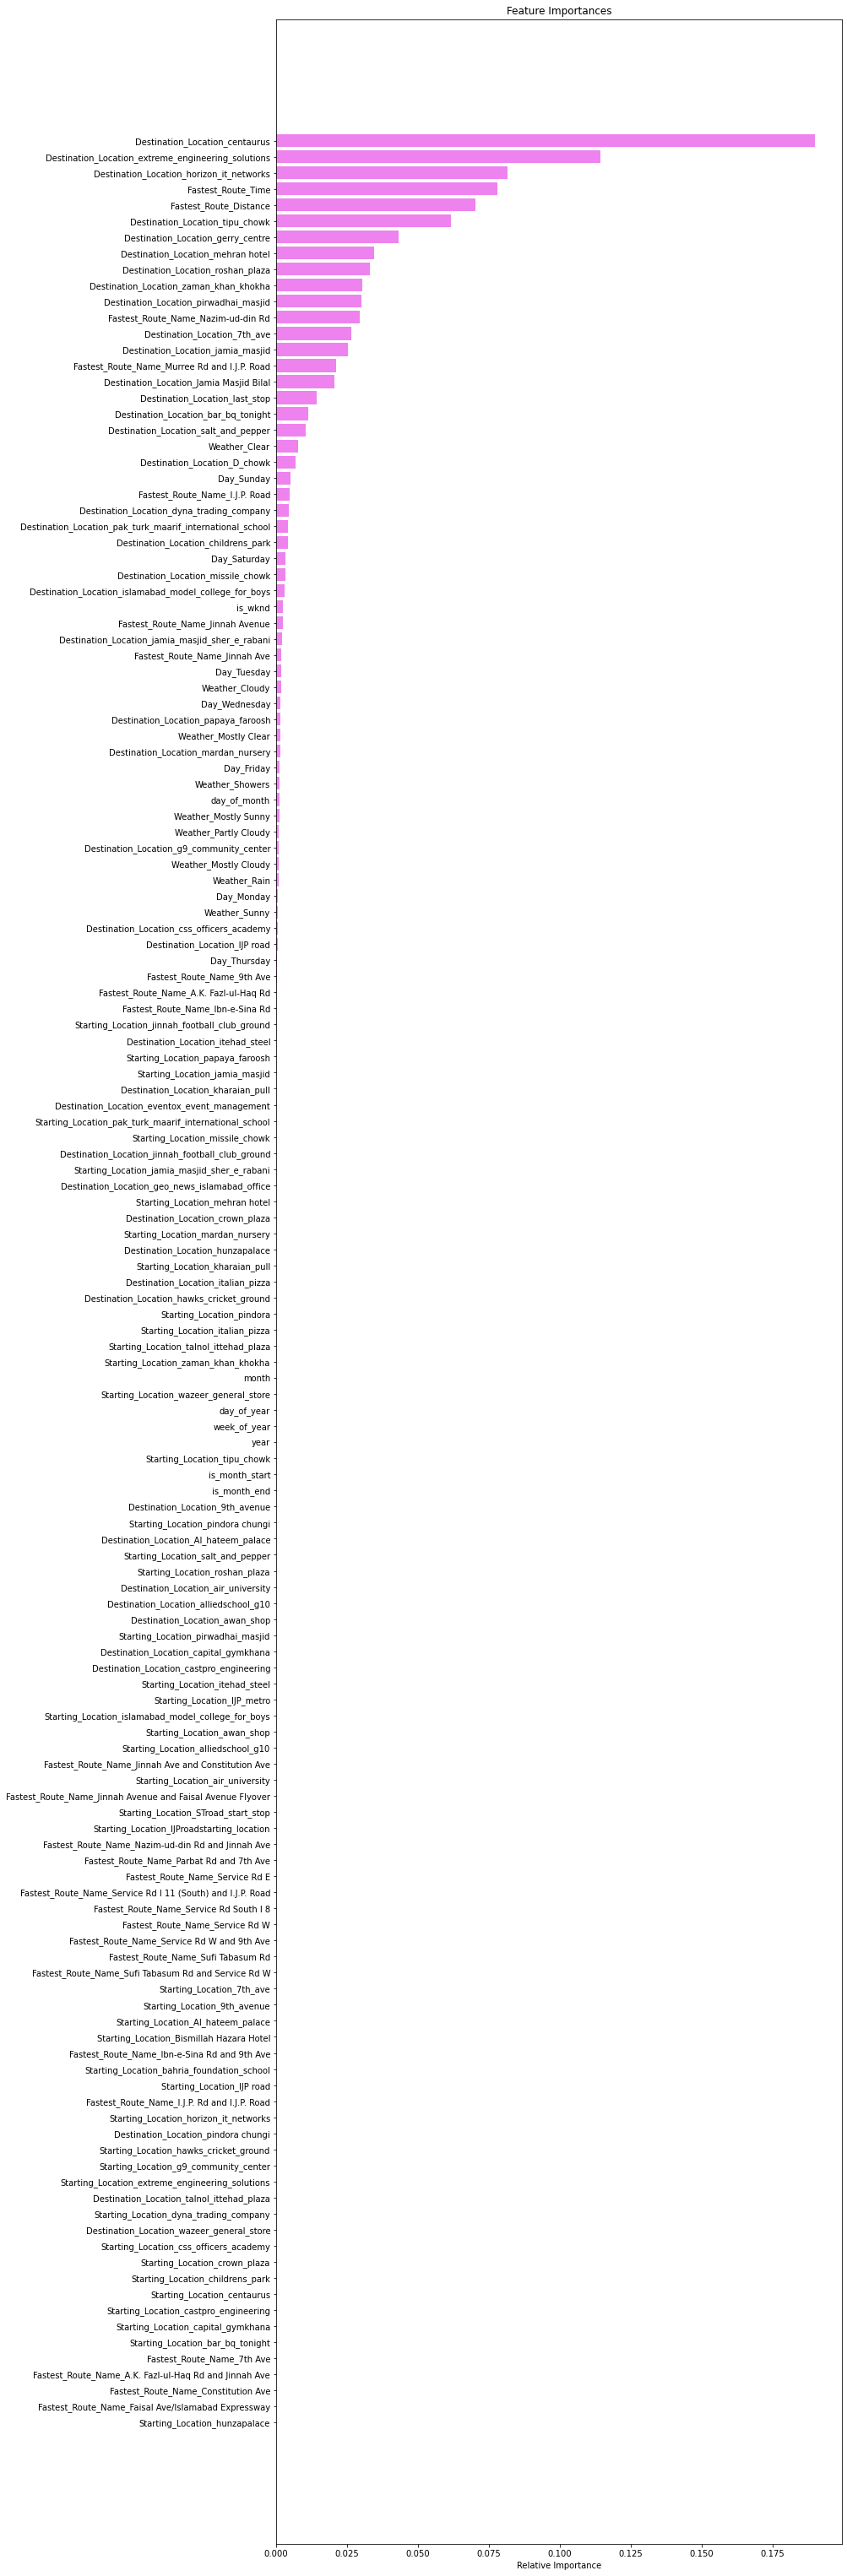

In [19]:
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,55))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This graph shows similar results but has destination location to be an important feature and this could be the result of how the XG Boost model works as it is prediction the traffic prediction accurately using that particular location. <br> But we also see that the Fastest_Route_Time and Fastest_Route_Distance are significantly important features which need to be collected to predict the results accurately.<br> We also notice that the day of the week is also an important feature.

### Bussiness Insights  

The Five most important features to build the model to predict the traffic status are as follows: <br> 1. Fastest Route Time <br> 2. Fastest Route Distance <br> 3. Destination Location <br> 4. Starting Location <br> 5. Day of the Week <br> With these features being given, current traffic situation can be predicted accurately.